# Assignment 2

## Formalia:

Please read the [assignment overview page](https://github.com/suneman/socialdata2023/wiki/Assignments) carefully before proceeding. This page contains information about formatting (including formats etc.), group sizes, and many other aspects of handing in the assignment. 

_If you fail to follow these simple instructions, it will negatively impact your grade!_

**Due date and time**: The assignment is due on Monday March 27th, 2023 at 23:55. Hand in your files via [http://peergrade.io](http://peergrade.io/). If you're not already a peergrade user, [you can use this link to sign up]( 
https://app.peergrade.io/join/44E47G) - **PLEASE USE YOUR DTU EMAIL WHEN YOU SIGN UP**.

**Peergrading date and time**: \[OPTIONAL FOR ASSIGNMENT 2\] _Remember that after handing in you MAY evaluate a few assignments written by other members of the class_. (Should you choose to do this, the deadline is Tuesday April 11 at noon). 

## A2: A short data story

This assignment is to create a short data-story based on the work we've done in class so far. See **Exercises Week 8, Part 2** for full details on how the story should be constructed.

In [14]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
data = pd.read_csv("../../1_opstart/Data/data_2003_to_May_2018.csv")
data["Dato"] = pd.to_datetime(data['Date'], format="%m/%d/%Y") # Make the data datetime
data['year']= data['Dato'].dt.year # Make a variable for year
data["week"]= data["Dato"].dt.day_name()
data["month"]= data["Dato"].dt.month_name()
data["Hour"] = pd.to_datetime(data["Time"], format="%H:%M").dt.hour
data["12_hours"] = [datetime.strftime(datetime.strptime(str(t), "%H"), "%I %p") for t in data["Hour"] ]
data["Weekday_Hour"] = data["week"] + "-" + data["12_hours"] 
report_data = data[data["year"]!=2018]
report_data.Resolution = report_data.Resolution.apply(lambda x: "Unresolved" if x=="NONE" else "Resolved") # Laver resolution


weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
hour_order = [datetime.strftime(datetime.strptime(str(t), "%H"), "%I %p") for t in range(24)]
weekday_hour_order = [weekday + "-" + hour for weekday in weekday_order for hour in hour_order]

focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

report_data = report_data[report_data['Category'].isin(focuscrimes)]

C:\Users\asger\AppData\Local\Temp\ipykernel_31348\3643796930.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  report_data.Resolution = report_data.Resolution.apply(lambda x: "Unresolved" if x=="NONE" else "Resolved") # Laver resolution


## OPGAVE

# Introduction

It is essential for a working society to be able to keep the law and order and enforce judgement on people who break the law, this is relevant both as  as a deterrent for people not to commit a crime as well as to ensure victims of crimes that justice is served. To gain a deeper understanding of crime patterns and how thay can be addressed, we seek to analyse this subject using data visualizations of the crime patterns in San Francisco. 

In this analysis of crime patterns, we start by visualising into the overall growth of resolved and unresolved crimes in San Francisco. We then examine whether any geographical patterns are apparent in the data, considering whether any areas of San Francisco have a lower or higher crime-solving rate. Finally, we will analyze the change in crime-solving rates between different types of crime.

When performing data analysis, it is essential to be clear about one's choices regarding the data cleaning process. The data we use for the analysis is from the [San Francisco State Department's website](https://data.sfgov.org/browse?category=Public+Safety). The data is from 2003 up to and including half of 2018. For data consistency, we have cut the data from 2018, thus our dataset is from 2003-2017, furthermore we have removed duplicates from the data. We have also taken a clearcut approach to the concept of "solving a crime", as we classify all crimes as either resolved or unresolved, thus we do not distinguish between, whether the crime report resulted in conviction, or if complainant refuses to prosecute, or if a prosecution is concluded to be unfounded, all these three would be classified as solved. Lastly we have choosen to focus on the most prevalent types of crimes: Weapon laws, Prostitution, Driving under the influence, Robbery, Burglary, Assault, Drunkenness, Drug/Narcotic, Trespass, Larceny/Theft, Vandalism, Vehicle theft, Stolen property, Disorderly conduct. 

We start our inspection of the evolution of the amount of unresolved crime reports in San Francisco, by visualising the overall distribution of resolved and unresolved crimes, thereby gaining an easy and simple to understand overview of the development. 

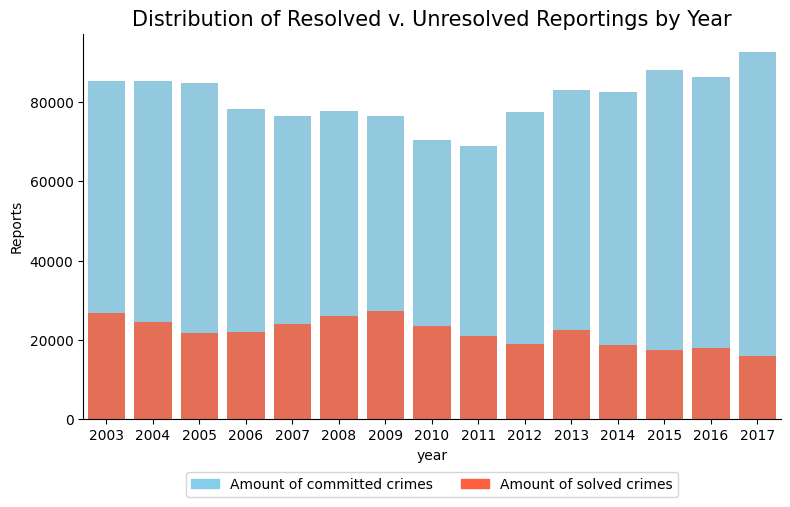

In [3]:
import seaborn as sns

resolution_by_year = report_data.groupby("year").Resolution.value_counts(normalize=False).rename("Reports").reset_index()

total_by_year = report_data.groupby("year").size().rename("Total Reports").reset_index()

resolution_by_year = pd.merge(total_by_year, resolution_by_year, on="year", how="outer")

for index, row in resolution_by_year.iterrows():
    if row['Resolution'] == 'Unresolved':
        resolution_by_year.at[index, 'Reports'] = row['Total Reports']

fig, ax = plt.subplots(figsize = (9,5))
sns.barplot(data = resolution_by_year, 
            x=  "year", 
            y = "Reports", 
            hue = "Resolution", 
            palette = ["skyblue","#FD603E"], 
            ax=ax, dodge=False) # Stacker alt efter om dodge er false eller true --> NEJ! 
plt.title("Distribution of Resolved v. Unresolved Reportings by Year", size = 15)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Remove title from the legend and place below plot
handles = [plt.Rectangle((0,0),1,1, color=color) for color in ["skyblue","#FD603E"]]
labels = ["Amount of committed crimes", "Amount of solved crimes"]

ax.legend(handles=handles, 
          labels=labels, 
          loc='upper center', 
          bbox_to_anchor=(0.5, -0.12),
          ncol=2)

# legend_labels = ["Amount of committed crimes", "Amount of solved crimes"]
# handles, labels = ax.get_legend_handles_labels()
# ax.legend(handles=handles[2:], 
#           labels= legend_labels, 
#           loc='upper center', 
#           bbox_to_anchor=(0.5, -0.12),
#           ncol = 2)

plt.show()

The number of resolved crimes has been been steadily falling since 2013, while the overall number of criminal activity has slowly risen since 2011. One explanation for this would maybe be that a higher rise in crime rate takes resources from the police department, making it harder for them to prioritize resources in actually solving the crimes. 

We will now look further into the nuances of the resolved and unresolved crimes. Maybe the lower amount of resolved crimes in San Francisco is because of the location of the crimes has changed, one could think that the police, in some way or another, find some locations easier to work with than others. Another angle could also be that the rise in unresolved crimes is a question of what type of crime is being committed, maybe some types of crimes are harder to solve than others? In the following plots we seek to take a deeper look into these two angles. 

## LOCATION PLOT! 

The original data has a neighborhood variable, but it is very broad. To obtain a more granular and nuanced view of crimes solved in each neighborhood, we have included another dataset on neihgboorhood geolocation in San Francisco from [San Francisco State Department](https://data.sfgov.org/Geographic-Locations-and-Boundaries/SF-Find-Neighborhoods/pty2-tcw4). By incorporating this data into our analysis, we can use the latitude and longitude data from our main dataset, and create an overall nuanced map of all the crime activity in San Francisco in the specific neighboorhoods. Additionally, we removed crime reports with missing values or those located outside San Francisco.

In [5]:
# Kort 
asdasdas

NameError: name 'asdasdas' is not defined

The above Plotly visualization comprises of three maps that depict three relevant pieces of information about the number of crimes resolved in San Francisco. The first map shows the total number of crime reports in San Francisco, and it is evident that some neighborhoods differ significantly in their total number of crime reports. `South of Market` has the highest number of reports at 280,000, followed closely by `Mission` and `Tenderloin`. Overall, the northeastern side of San Francisco seems to have the largest number of crime reports.

When one looks into the second map, which maps the share of unresolved reports, it is prevalent that `Lincoln Park` and `Presidio National Park` are the areas with the highest amount of unresolved crimes. But one should be careful concluding too much though, as these two spots also only have around 210 reported crimes. So, a rather few solved or unresolved crimes can easily change these two neighborhoods' share of unresolved crimes. An interesting finding is that the police seem to have a relatively high amount of resolved crime cases in the aforementioned areas, which also had the highest amount of crimes. Maybe the police are focusing their crime solving ressources on locations they also know have a high amount of crime. 

The third and final map shows the development of unresolved reports in the different neighborhoods. It visualizes whether the individual neighborhoods have a rise or fall in unresolved crime cases. Observing this final map, one sees a general rising tendency among all neighborhoods to have a rising amount of unresolved crimes. This makes sense with considerations to the first plot, where we also observed that the amount of resolved crimes were falling. `Parnassus Heights` and `Parkmerced` seem to be the only areas that have actually succeeded in having a negative slope regarding the solving of crime cases. They are both interesting cases as they do not have significantly fewer crimes than the other neighborhoods or any other characteristics that make these two spots unique. Thus, it would be relevant within the police and state departments to look more into these two areas and take inspiration from their work, maybe.

# INTERAKTIVT PLOT

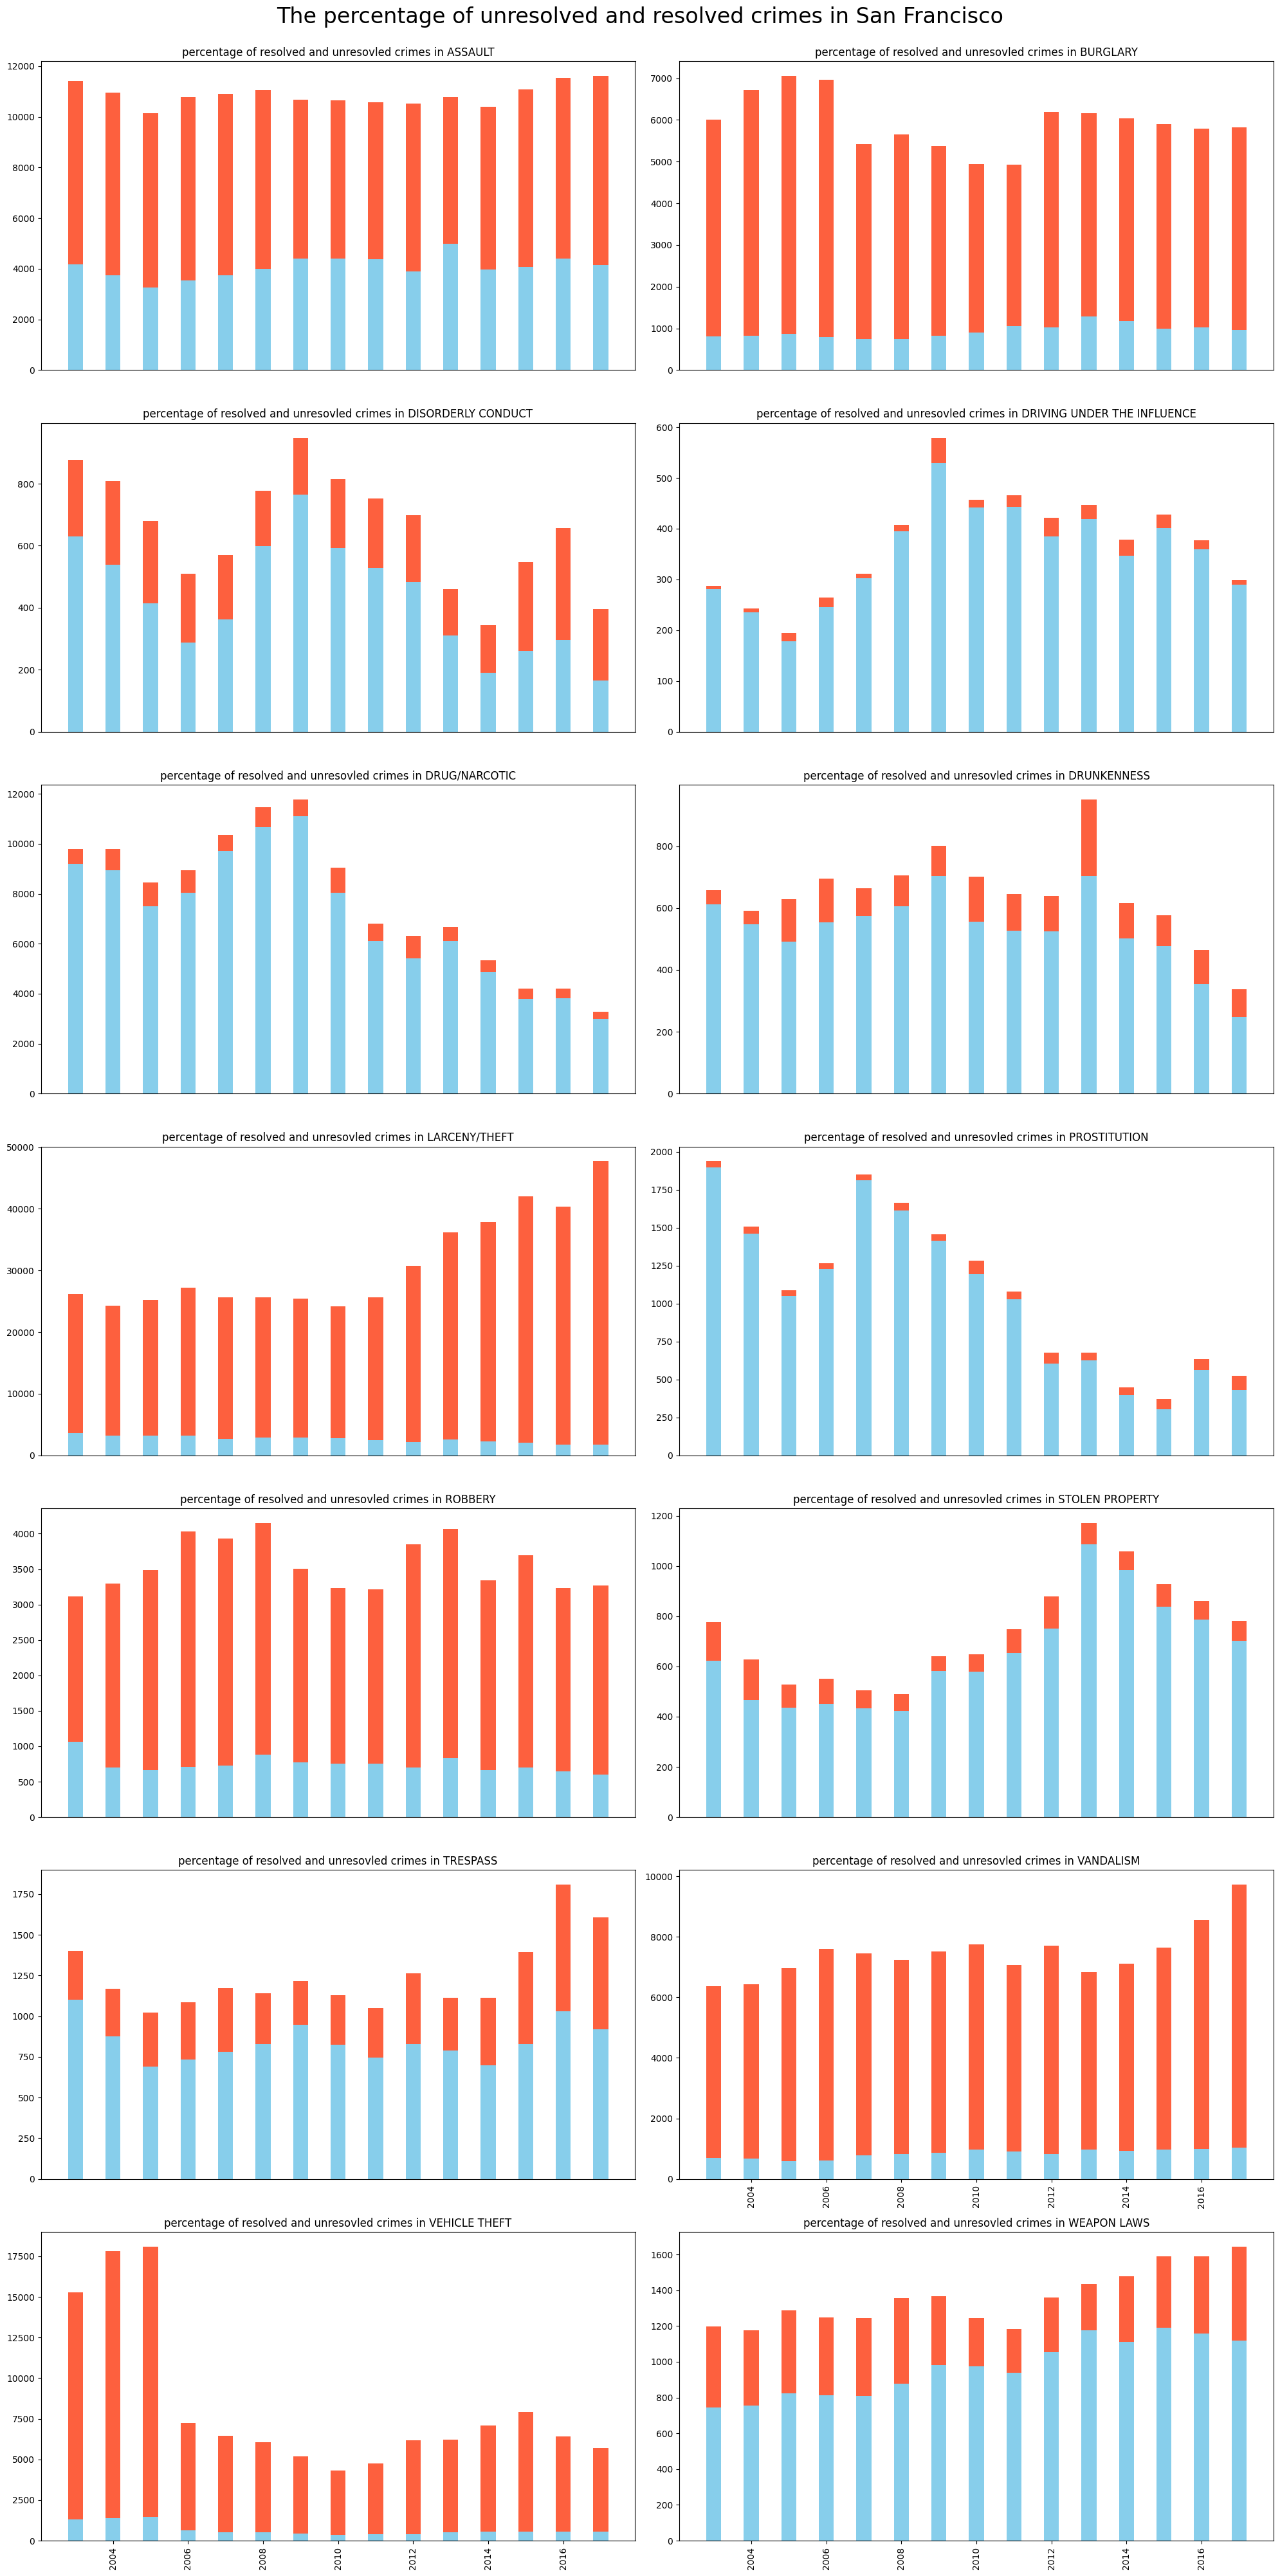

In [39]:
t = 1
fig = plt.figure(figsize=(20,40))
for x in sorted(report_data.Category.unique()): 
    df = report_data[report_data["Category"]==x]
    df = df.groupby(['year', 'Resolution']).size().reset_index(name='percent')
    #df = df.groupby(['year', 'Resolution']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index(name='percent')
    df = df.pivot(index = "year", values = "percent", columns = "Resolution")

    plt.subplot(7,2,t)
    if t < 12: 
        plt.xticks([])
    else:
        plt.xticks(rotation=90)
    plt.bar(df.index, df.Resolved, width=0.4, align= "center", color="skyblue")
    plt.bar(df.index, df.Unresolved, width=0.4, bottom = df.Resolved, align= "center", color="#FD603E",)
    plt.title(f"Resolved and unresovled crimes in {x}")
    t +=1
    
plt.suptitle("Unresolved and resolved crimes in San Francisco", fontsize=24, y=1.00)
plt.tight_layout()

Inspecting the relation between crimetypes and whether the crime was resolved some relevant observations become apparent. The crime type `Larcency/theft` seems to have a notable increase, while the number of resolved `Larcency/theft` crimes have not followed. This could be one of the main factors behind the overall rise in unresolved crimes in San Francisco. One sees the same pattern with `Vandalism` and `Trespass` where both also has risen in occurences, while the amount of resolved crimes of vandalism has remained steady. `Weapon Laws` has risen aswell, but here it also seems that the amount of resolved `Weapon Laws` crimes has also risen.

The crime types which has fallen in activity also seems in most cases to be the types which where the easiest to solve. `Prostitution`, `Drunkenness`, `Drug/Narcotic`, and `Driving under the influence` all have a very high rate of solved cases, but also seems to be following an down going trend. This could also be a reason for the overall fall in solved crimes reports in San Francisco. For further studies it would be interesting to see whether there exist an significant relation between specific crime types being solved, and that type of crime dissapearing. `Vehicle Theft` has seen a dramatiic reduction after 2005, because of a new safety system implemented in cars (VAR DET IKKE NOGET SUNE HAR SAGT ELLER SKREVET ET STED? KAN IKKE FINDE DET NOGLE STEDER, MEN SYNES JEG KAN HUSKE DET?!) making them apparently much harder to steal. Since this crime type has such a high rate of unresolved cases it seems problematic, that the share of resolved cases has not fallen. 

# Further thoughts

We have tried to represent an overview of the evolution and nature of unsolved crime cases in San Francisco. Some key points is that the overall evolution of unreolved crimes cases are rising. It would be relevant to look further into the neighboorhoods of `Parnassus Heights` and `Parkmerced` since these two locations are the only ones with a negative development of unresolved crime cases. It would also be of high importance to focus ressoruces on developing ways to solve cases of lacency/theft more effectively, sinse this type of crime are rising and apparently very hard to solve. For further studies one could consider looking more into the influence of location and crime type. Furthermore it would also be relevant to look more into a mix of these two, so maybe consider what types of crimes are prevalent at what loacations, and what can the police do to deal with these. 